In [39]:
# Libraries and Pacakges

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Reading data from the CSV File

try:
    # read all rows of the cleaned data CSV file into a pandas DataFrame
    df = pd.read_csv('cleaned_data_final_papers_data.csv', usecols=['paper ID', 'references', 'paper title', 'publication year', 'authors'], nrows=31508, on_bad_lines='skip')
except pd.errors.ParserError as e:
    # print the error message and continue processing the file
    print(f"Error: {e}")
    df = pd.DataFrame()
    print(df)

The following code is to further clean the dataset as it contains same papers counted more than once with the only differnce is case-sensitivty in their titles

In [41]:
# Convert the titles to lowercase for comparison
df['paper title'] = df['paper title'].str.lower()

# Initialize a set to store unique titles and IDs
unique_titles = set()
unique_ids = set()

# List to keep track of duplicate rows
duplicate_rows = []

# Loop over the DataFrame rows
for index, row in df.iterrows():
    title = row['paper title']
    paper_id = row['paper ID']
    # Check if the title or ID is already seen
    if title in unique_titles or paper_id in unique_ids:
        duplicate_rows.append(index)
    else:
        unique_titles.add(title)
        unique_ids.add(paper_id)

# Drop the duplicate rows
df.drop(duplicate_rows, inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)


In [42]:
# Print the resulting DataFrame
print(df)

                                       paper ID   
0      95987be1ea3dd42265c77a8e5f1e69f70b5703f6  \
1      4062a1227c542d142b511d932f5548c858c65964   
2      4ddc93f0abcd940f859efd4918f999dbc408dbe4   
3      e604ef985667b48fdb1531339ec7715ed1078743   
4      083318524a2f49e17924fdbbda161308a00ef5fb   
...                                         ...   
30900  a2f60470a9eb72b919300bbbdc6e18fc0edb5153   
30901  342d427098a869fdefc773ab5f8c842b4a339501   
30902  ff43e417f7578c5770fe5765f8efcf7378a53597   
30903  154cd64cae84112b6bf3156e3cee7e3928a981e9   
30904  703f556d5c65fd744ccecc464f08f3f19ccc96b4   

                                             paper title  publication year   
0      comparing serum pentraxin 3 in diabetic patien...            2023.0  \
1      comparative study between metformin and insuli...            2022.0   
2      glycemic gap and the outcome of diabetic patie...            2022.0   
3      screening for diabetes in the adult population...            2022.0 

Creating the citation network graph

In [43]:
# Creatin a Node for every paper in AlGoNEt Dataset

#create an empty directed graph
G = nx.DiGraph()

for row in df.iterrows():
    #add the paper as a node with its ID as the label
    G.add_node(row[1]["paper ID"])

In [44]:
# Process the graph adding edges between ever paper's id and all its included references' ids

unprocessed_rows = 0
rows=0

for i, row in df.iterrows():
    try:
        rows+=1
        for reference in eval(row["references"]):
        
            if reference["paperId"] ==None:
                break
            else:
                G.add_edge(row["paper ID"], reference["paperId"])
                
    except Exception as e:
        unprocessed_rows+=1
        print(f"Error processing row {i}: {e}")
        continue

In [45]:
# Set the layout of the graph
pos = nx.random_layout(G)

Note: 

The following line of code takes long time running and needs high computational power to display the graph for the whole AlGoNet Dataset. The output show is for the first 500 nodes only and it took some few minutes running.

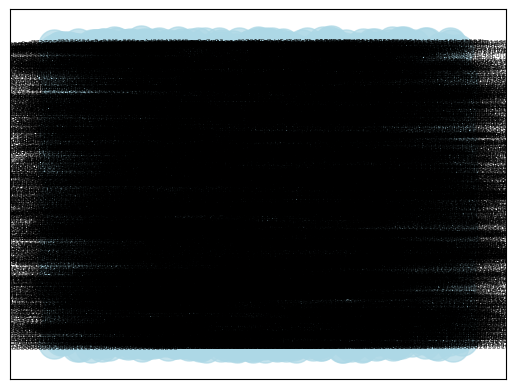

In [ ]:
# Draw the graph
nx.draw_networkx(G, pos, node_size = 500, node_color='lightblue', edge_color='gray', alpha=0.7, font_size=5)

In [ ]:
# title 
plt.title("Citation Network")


plt.show()

# save the graph as a GraphML file
nx.write_graphml(G, 'citation_network.graphml')

# save the figure to a file
plt.savefig('citation_network.png')


In [38]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of unprocessed rows: {unprocessed_rows}")

print("Graph construction is complete.")

Number of nodes: 320969
Number of edges: 365740
Number of unprocessed rows: 0
Graph construction is complete.


Temporal Analysis of Publications

In [49]:
# Create an empty set to store unique years
unique_years = set()

# Initialize variables for the most recent and oldest publication year
most_recent_year = float('-inf')
oldest_year = float('inf')

# Loop over the DataFrame rows
for index, row in df.iterrows():
    # Extract the publication year from the row and convert it to int
    publication_year = int(row['publication year'])
    
    # Add the year to the set of unique years
    unique_years.add(publication_year)
    
    # Update the most recent and oldest years if necessary
    if publication_year > most_recent_year:
        most_recent_year = publication_year
    if publication_year < oldest_year:
        oldest_year = publication_year


# Print the most recent and oldest years
print("Most Recent Year:", int(most_recent_year))
print("Oldest Year:", int(oldest_year))
print()

# Group the data by publication year and get the count of papers for each year
year_counts = df['publication year'].value_counts()

# Print the count of papers for each unique year
print("Count of Papers per Year:")
for year, count in year_counts.items():
    print(f"Year: {int(year)}, Count: {count}")


Most Recent Year: 2023
Oldest Year: 1903

Count of Papers per Year:
Year: 2021, Count: 2807
Year: 2022, Count: 2717
Year: 2020, Count: 2630
Year: 2019, Count: 2209
Year: 2018, Count: 2133
Year: 2017, Count: 1868
Year: 2016, Count: 1841
Year: 2015, Count: 1600
Year: 2014, Count: 1421
Year: 2013, Count: 1248
Year: 2012, Count: 1091
Year: 2011, Count: 964
Year: 2010, Count: 804
Year: 2023, Count: 802
Year: 2009, Count: 786
Year: 2008, Count: 579
Year: 2007, Count: 495
Year: 2006, Count: 441
Year: 2005, Count: 380
Year: 2004, Count: 377
Year: 2002, Count: 279
Year: 2003, Count: 264
Year: 2001, Count: 226
Year: 2000, Count: 217
Year: 1998, Count: 213
Year: 1996, Count: 187
Year: 1997, Count: 184
Year: 1999, Count: 176
Year: 1990, Count: 144
Year: 1994, Count: 131
Year: 1995, Count: 122
Year: 1988, Count: 110
Year: 1989, Count: 109
Year: 1991, Count: 105
Year: 1992, Count: 104
Year: 1993, Count: 103
Year: 1986, Count: 93
Year: 1984, Count: 87
Year: 1987, Count: 86
Year: 1985, Count: 74
Year:

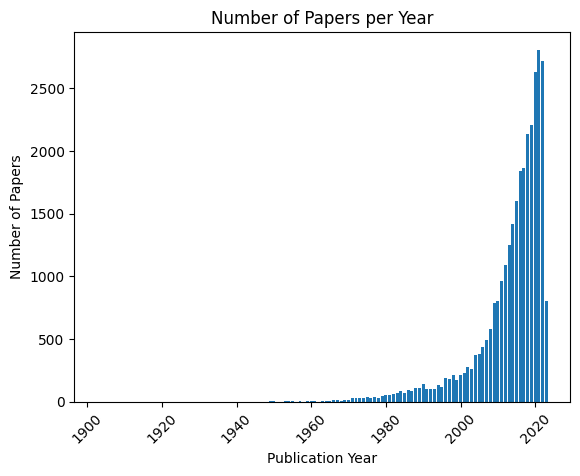

In [50]:
# Convert the publication years and paper counts to integers
years = year_counts.index.astype(int)
counts = year_counts.values

# Create a bar plot
plt.bar(years, counts)

# Set the labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers per Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Degree Distribution Analysis

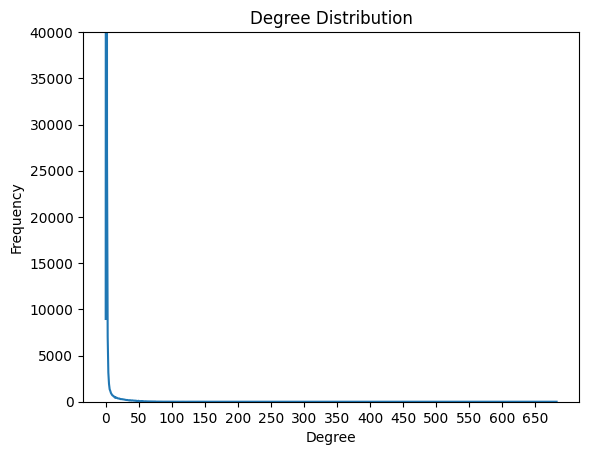

In [51]:
# Degree Distribution Analysis

# Compute the degree distribution
degrees = [d for n, d in G.degree()]
degree_distribution = nx.degree_histogram(G)

# Plot the degree distribution 
#plt.figure(figsize=(8,8))
plt.plot(degree_distribution)

# modify x-axis
plt.xticks(range(0, len(degree_distribution), 50))

# modify y-axis
plt.yticks(range(0, max(degree_distribution)+1, 5000))

plt.ylim([0, 40000])

plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")

plt.show()




The previous degree distribution shows how the number of nodes in the network is distributed across different degrees where the degree of a node represents the number of citations it received from other nodes in the network. It is shown that the majority of nodes in the network have a low degree (less than 50) which indicates that most publications by Egyptian authors have a relatively low number of citations. However, the long tail in the distribution represents the small number of highly cited publications that have a much higher degree.

The degree distribution also appears to follow a power law distribution, with a few highly connected nodes (publications) and many nodes with few connections. This pattern is often observed in citation networks and is known as the "rich get richer" phenomenon, where highly cited publications tend to receive more citations over time, leading to a skewed distribution of citations.

Overall, the degree distribution analysis suggests that there are a few highly influential publications by Egyptian authors that have received a large number of citations, while the majority of publications have received relatively few citations.

-------------------------------------------------------------------------------------------------------------------------------------------------

Centrality Analysis

- Degree Centrality
we computed the degree centrality for all the nodes in the network. We determined the papers with the highest and the lowest degrees as well as the average degree for the network. Then we printed the top 50 papers by degree centrality.

- To do further analysis:
we filtered the data to include papers with publication years > 2015 and apply Degree Centrality, Betweenness Centrality, and Eigenvector Centrality printing the top 50 paper for each of them.

In [52]:
# calculate degree for each node
degrees = dict(G.degree())

# calculate average degree
avg_degree = sum(degrees.values()) / len(degrees)

# get node with highest degree
max_degree_node = max(degrees, key=degrees.get)
max_degree = degrees[max_degree_node]
max_degree_title = df.loc[df['paper ID'] == max_degree_node]['paper title'].values[0]

# get node with lowest degree
min_degree_node = min(degrees, key=degrees.get)
min_degree = degrees[min_degree_node]
min_degree_title = df.loc[df['paper ID'] == min_degree_node]['paper title'].values[0]

print(f"Highest degree paper: {max_degree_title} ({max_degree} degrees)")
print(f"Lowest degree paper: {min_degree_title} ({min_degree} degrees)")
print(f"Average degree: {avg_degree:.2f}")



Highest degree paper: volumes 357â€“377 (1995) (682 degrees)
Lowest degree paper: comparing serum pentraxin 3 in diabetic patients with and without retinopathy. (0 degrees)
Average degree: 2.28


In [53]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Print the top 50 most central publications for each centrality measure
print('Top 50 most central publications (by degree centrality):')
i=1
for node_id, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]:
    title = df.loc[df['paper ID'] == node_id]['paper title'].values[0]
    print(f'{i}- Title: {title}: \n Degree Centrality: {centrality:.4f}')
    i+=1


Top 50 most central publications (by degree centrality):
1- Title: volumes 357â€“377 (1995): 
 Degree Centrality: 0.0021
2- Title: managing gsh elevation and hypoxia to overcome resistance of cancer therapies using functionalized nanocarriers: 
 Degree Centrality: 0.0014
3- Title: bicyclic 5-6 systems: other four heteroatoms 2:2: 
 Degree Centrality: 0.0013
4- Title: study of immunomics and immune regulation in ovarian cancer: 
 Degree Centrality: 0.0012
5- Title: synthetic strategies for modified glycosphingolipids and their design as probes.: 
 Degree Centrality: 0.0012
6- Title: translating complexity and heterogeneity of pancreatic tumor: 3d in vitro to in vivo models.: 
 Degree Centrality: 0.0012
7- Title: cutting-edge development in waste-recycled nanomaterials for energy storage and conversion applications: 
 Degree Centrality: 0.0010
8- Title: an insight into carbon nanomaterial-based photocatalytic water splitting for green hydrogen production: 
 Degree Centrality: 0.0009
9- T

Centrality Analysis for papers only published after year 2015

In [54]:
# Filter the dataframe to include only papers published after 2015
df_recent = df[df['publication year'] > 2015]

# Create a new networkx graph using the filtered dataframe
G_recent = nx.DiGraph()

for i, row in df.iterrows():
    try:
        for reference in eval(row["references"]):
            if reference["paperId"] is None:
                break
            else:
                G_recent.add_edge(row["paper ID"], reference["paperId"])
    except Exception as e:
        print(f"Error processing row {i}: {e}")
        continue

Degree Centrality

In [59]:
# Compute degree centrality
degree_centrality_recent = nx.degree_centrality(G_recent)

print('Top 50 most central publications (by degree centrality) for papers published after 2015:')
i = 1
for node_id, centrality in sorted(degree_centrality_recent.items(), key=lambda x: x[1], reverse=True):
    if i > 50:
        break
    matching_rows = df_recent.loc[df_recent['paper ID'] == node_id]
    if not matching_rows.empty:
        title = matching_rows['paper title'].values[0]
        print(f'{i}- Title: {title}\nDegree Centrality: {centrality:.4f}\nPublication Year: {int(matching_rows["publication year"].values[0])}')
        i += 1


Top 50 most central publications (by degree centrality) for papers published after 2015:
1- Title: managing gsh elevation and hypoxia to overcome resistance of cancer therapies using functionalized nanocarriers
Degree Centrality: 0.0015
Publication Year: 2021
2- Title: synthetic strategies for modified glycosphingolipids and their design as probes.
Degree Centrality: 0.0012
Publication Year: 2018
3- Title: translating complexity and heterogeneity of pancreatic tumor: 3d in vitro to in vivo models.
Degree Centrality: 0.0012
Publication Year: 2021
4- Title: cutting-edge development in waste-recycled nanomaterials for energy storage and conversion applications
Degree Centrality: 0.0011
Publication Year: 2022
5- Title: an insight into carbon nanomaterial-based photocatalytic water splitting for green hydrogen production
Degree Centrality: 0.0010
Publication Year: 2022
6- Title: transcriptional and epigenetic control of mammalian olfactory epithelium development
Degree Centrality: 0.0008
Pu

Note:

The algorithm used for computing the following betweeness centrality is relatively slow and takes hours running on AlGoNet even with parallelization. So, it is not included in the analysis presented in our paper.

Betweenness Centrality

In [14]:
# Compute Betweenness Centrality for papers (>2015)

import multiprocessing

# Compute betweenness centrality for a given node
def compute_betweenness_centrality(node):
    return node, nx.betweenness_centrality(G_recent)[node]

# Get a list of nodes in the graph
nodes = list(G_recent.nodes())

# Number of processes to use
num_processes = multiprocessing.cpu_count()

# Create a pool of worker processes
pool = multiprocessing.Pool(processes=num_processes)

# Compute betweenness centrality in parallel for all nodes
results = pool.map(compute_betweenness_centrality, nodes)

# Close the pool
pool.close()

# Collect the results into a dictionary
betweenness_centrality_dict = dict(results)

# Print the top 50 most central publications for the recent graph by betweenness centrality
print('Top 50 most central publications (by betweenness centrality) for papers published after 2015:')
i = 1
for node_id, centrality in sorted(betweenness_centrality_dict.items(), key=lambda x: x[1], reverse=True)[:50]:
    matching_rows = df_recent.loc[df_recent['paper ID'] == node_id]
    if not matching_rows.empty:
        title = matching_rows['paper title'].values[0]
        publication_year = int(matching_rows['publication year'].values[0])
        print(f'{i}- Title: {title}\nBetweenness Centrality: {centrality:.4f}\nPublication Year: {int(matching_rows["publication year"].values[0])}')
        i += 1

Eigenvector Centrality

In [60]:
eigenvector_centrality_recent = nx.eigenvector_centrality(G_recent)

print('Top 50 most central publications (by eigenvector centrality) for papers published after 2015:')
i = 1
for node_id, centrality in sorted(eigenvector_centrality_recent.items(), key=lambda x: x[1], reverse=True):
    if i > 50:
        break
    matching_rows = df_recent.loc[df_recent['paper ID'] == node_id]
    if not matching_rows.empty:
        title = matching_rows['paper title'].values[0]
        print(f'{i}- Title: {title}\nEigenvector Centrality: {centrality:.4f}\nPublication Year: {int(matching_rows["publication year"].values[0])}')
        i += 1


Top 50 most central publications (by eigenvector centrality) for papers published after 2015:
1- Title: efficacy and biological correlates of response in a phase ii study of venetoclax monotherapy in patients with acute myelogenous leukemia.
Eigenvector Centrality: 0.3143
Publication Year: 2016
2- Title: evaluation of rifampin's transporter inhibitory and cyp3a inductive effects on the pharmacokinetics of venetoclax, a bclâ€گ2 inhibitor: results of a singleâ€گ and multipleâ€گdose study
Eigenvector Centrality: 0.2362
Publication Year: 2016
3- Title: effect of lowâ€گ and highâ€گfat meals on the pharmacokinetics of venetoclax, a selective firstâ€گinâ€گclass bclâ€گ2 inhibitor
Eigenvector Centrality: 0.1775
Publication Year: 2016
4- Title: pharmacokinetics of venetoclax, a novel bclâ€گ2 inhibitor, in patients with relapsed or refractory chronic lymphocytic leukemia or nonâ€گhodgkin lymphoma
Eigenvector Centrality: 0.1443
Publication Year: 2017
5- Title: abstract 2045: relationship of veneto

Degree centrality measures the number of direct connections a node has, i.e., the number of citations a paper has. It provides a measure of how influential a paper is based on the number of direct references it receives. 

On the other hand, eigenvector centrality considers both the number of connections a node has and the centrality of its neighbors. It assigns higher importance to nodes that are connected to other highly central nodes so it takes into account the global structure of the network, whereas degree centrality focuses solely on the immediate connections of each node.
Simply, it captures the notion that being connected to influential nodes contributes to the overall centrality of a node, which may differ from the simple count of connections provided by degree centrality.

-------------------------------------------------------------------------------------------------------------------------------------------------

Clustering Coefficient

In [17]:
# Calculate clustering coefficient for each node
cc = nx.clustering(G)

# Print average clustering coefficient
avg_cc = sum(cc.values()) / len(cc)
print(f"Average clustering coefficient: {avg_cc}")


Average clustering coefficient: 0.019107480538823315


The low average clustering coefficient suggests that the nodes in this citation network have relatively few connections to their neighbors, and there is a lack of tightly connected communities or clusters within the network. 

This could indicate that the citations between papers in the network are more random or sporadic, rather than forming cohesive groups or neighborhoods of interconnected papers.

Another potential implication is that the papers in the network may have diverse topics or have different research areas, resulting in less clustering of citations.

-------------------------------------------------------------------------------------------------------------------------------------------------

Density Analysis

In [18]:
# Calculate density of the graph
density = nx.density(G)
print(f"Density of the graph: {density}")


Density of the graph: 3.5501576199356724e-06


The low density value suggests that the number of actual connections (citations) in the network is relatively small compared to the maximum possible number of connections. This implies that there are many potential connections that are not present in the network, resulting in a sparse or sparsely connected graph.

It can indicate that the papers in your citation network have relatively few citations or that the citation relationships are not densely interconnected. This could be due to various reasons, such as:

1- A large number of papers with limited or no citations.

2- A diverse range of topics within the network leading to fewer direct connections.

3- The network size itself can affect the density as larger networks tend to have lower density values. This is because the number of possible connections increases exponentially compared to the actual connections.

-------------------------------------------------------------------------------------------------------------------------------------------------


Network Type

In [13]:
# Check if the graph is directed
if G.is_directed():
    print("The graph is directed.")
else:
    print("The graph is undirected.")

# Check if the graph is a tree
if nx.is_tree(G):
    print("The graph is a tree.")
else:
    print("The graph is not a tree.")


The graph is directed.
The graph is not a tree.


Authorship Pattern Analysis

In [19]:
# Create a dictionary to store the count of papers for each unique count of authors
papers_count_by_author_count = {}

# Loop over the DataFrame rows
for index, row in df.iterrows():
    # Extract the authors from the row
    authors = eval(row['authors'])
    
    # Count the number of authors for the current paper
    author_count = len(authors)
    
    # Update the count of papers for the current author count
    if author_count in papers_count_by_author_count:
        papers_count_by_author_count[author_count] += 1
    else:
        papers_count_by_author_count[author_count] = 1

# Print the count of papers for each unique author count
print("Author Count - Paper Count:")
for author_count, paper_count in papers_count_by_author_count.items():
    print(f"Author Count: {author_count}, Paper Count: {paper_count}")



Author Count - Paper Count:
Author Count: 5, Paper Count: 3973
Author Count: 4, Paper Count: 6115
Author Count: 6, Paper Count: 2494
Author Count: 3, Paper Count: 5640
Author Count: 2, Paper Count: 3964
Author Count: 38, Paper Count: 5
Author Count: 29, Paper Count: 8
Author Count: 12, Paper Count: 282
Author Count: 39, Paper Count: 11
Author Count: 34, Paper Count: 5
Author Count: 19, Paper Count: 44
Author Count: 1, Paper Count: 2856
Author Count: 7, Paper Count: 1601
Author Count: 32, Paper Count: 8
Author Count: 18, Paper Count: 58
Author Count: 15, Paper Count: 125
Author Count: 9, Paper Count: 700
Author Count: 11, Paper Count: 354
Author Count: 13, Paper Count: 207
Author Count: 42, Paper Count: 5
Author Count: 8, Paper Count: 1054
Author Count: 14, Paper Count: 166
Author Count: 21, Paper Count: 26
Author Count: 110, Paper Count: 3
Author Count: 500, Paper Count: 46
Author Count: 73, Paper Count: 3
Author Count: 209, Paper Count: 1
Author Count: 16, Paper Count: 77
Author Count

In [20]:
# Create dictionaries to store the papers for each unique count of authors
papers_by_author_count = {}

# Loop over the DataFrame rows
for index, row in df.iterrows():
    # Extract the authors and title from the row
    authors = eval(row['authors'])
    title = row['paper title']  # Replace 'title' with the correct column name
    
    # Count the number of unique author sets for the current paper
    author_count = len(authors)
    
    # Update the list of papers for the current author count
    if author_count in papers_by_author_count:
        papers_by_author_count[author_count].append(title)
    else:
        papers_by_author_count[author_count] = [title]


# Find the unique author counts in ascending order
author_counts = sorted(papers_by_author_count.keys())

# Print the count of papers for each unique author count
print("Author Count - Paper Count:")
for author_count in author_counts:
    paper_titles = papers_by_author_count[author_count]
    print(f"Author Count: {author_count}, Paper Count: {len(paper_titles)}")

    print()  

# Find the largest and smallest author counts
largest_author_count = max(papers_by_author_count.keys())
smallest_author_count = min(papers_by_author_count.keys())

# Print the largest author count with paper titles
print("\nLargest Author Count:")
print(f"Author Count: {largest_author_count}, Paper Count: {len(papers_by_author_count[largest_author_count])}")
print("Paper Titles:")
i = 1
for title in papers_by_author_count[largest_author_count]:
    print(f"{i}- {title}")
    i += 1

# Print the smallest author count with paper titles
print("\nSmallest Author Count:")
print(f"Author Count: {smallest_author_count}, Paper Count: {len(papers_by_author_count[smallest_author_count])}")
print("Paper Titles:")
j = 1
for title in papers_by_author_count[smallest_author_count]:
    print(f"{j}- {title}")
    j += 1




Author Count - Paper Count:
Author Count: 1, Paper Count: 2856

Author Count: 2, Paper Count: 3964

Author Count: 3, Paper Count: 5640

Author Count: 4, Paper Count: 6115

Author Count: 5, Paper Count: 3973

Author Count: 6, Paper Count: 2494

Author Count: 7, Paper Count: 1601

Author Count: 8, Paper Count: 1054

Author Count: 9, Paper Count: 700

Author Count: 10, Paper Count: 632

Author Count: 11, Paper Count: 354

Author Count: 12, Paper Count: 282

Author Count: 13, Paper Count: 207

Author Count: 14, Paper Count: 166

Author Count: 15, Paper Count: 125

Author Count: 16, Paper Count: 77

Author Count: 17, Paper Count: 68

Author Count: 18, Paper Count: 58

Author Count: 19, Paper Count: 44

Author Count: 20, Paper Count: 60

Author Count: 21, Paper Count: 26

Author Count: 22, Paper Count: 41

Author Count: 23, Paper Count: 17

Author Count: 24, Paper Count: 20

Author Count: 25, Paper Count: 23

Author Count: 26, Paper Count: 17

Author Count: 27, Paper Count: 13

Author Count:

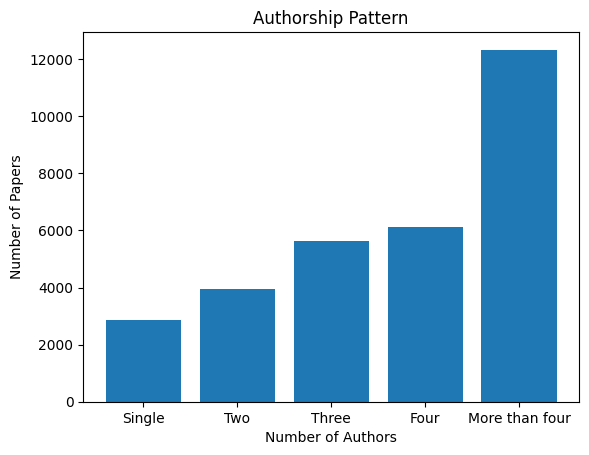

1- Single: 2856

2- Two: 3964

3- Three: 5640

4- Four: 6115

5- More Than Four: 12330



In [21]:
# Initialize counts for each authorship category
single_count = 0
two_count = 0
three_count = 0
four_count = 0
more_than_four_count = 0

# Iterate over the author counts
for author_count, paper_titles in papers_by_author_count.items():
    if author_count == 1:
        single_count += len(paper_titles)
    elif author_count == 2:
        two_count += len(paper_titles)
    elif author_count == 3:
        three_count += len(paper_titles)
    elif author_count == 4:
        four_count += len(paper_titles)
    elif author_count > 4:
        more_than_four_count += len(paper_titles)

# Create lists for the authorship categories and paper counts
categories = ['Single', 'Two', 'Three', 'Four', 'More than four']
paper_counts = [single_count, two_count, three_count, four_count, more_than_four_count]


# Plot the authorship pattern
plt.bar(categories, paper_counts)
plt.xlabel("Number of Authors")
plt.ylabel("Number of Papers")
plt.title("Authorship Pattern")

# Show the plot
plt.show()

i=1
while i<=5:
    if(i==1):
        print(f'{i}- Single: {single_count}\n')

    elif (i==2):
        print(f'{i}- Two: {two_count}\n')
    
    elif (i==3):
        print(f'{i}- Three: {three_count}\n')

    elif (i==4):
        print(f'{i}- Four: {four_count}\n')
    
    else:
        print(f'{i}- More Than Four: {more_than_four_count}\n')
    
    i+=1




It is evident from the figure that out of all the included papers (30905 papers), four-authored papers (6115 papers) are little ahead than three-authored papers (5640 papers) followed by two-authored papers (3964 papers), while single-authored papers (2856 articles) are at the back foot. The remaining papers having more than 4 authors (12330 papers) are the majority.
Hence, it is inferred that, the trend of collaborative research has taken place among the Egyptian papers of this collected dataset.

-----------------------------------------------------------------------------------------------------------------------------------------------------  

Strongly Connected Components Analysis

In [17]:
# Make a dictionar map of the authors' IDs and their names

# Define the mapping dictionary id_to_authors
id_to_authors = {}
id_to_title = {}

# Iterate over the rows of the dataset
for index, row in df.iterrows():
    node_id = row['paper ID']
    authors_info = eval(row['authors'])  

    # Extract the necessary information for each author
    authors = []
    for author_info in authors_info:
        author_name = author_info['name']
        authors.append(author_name)
    
    # Store the author information in the mapping dictionary
    id_to_authors[node_id] = authors
    id_to_title[node_id] = row['paper title']

In [18]:
# Perform connected component analysis
strongly_connected_components = list(nx.strongly_connected_components(G))

# Print the number of strongly connected components
num_components = len(strongly_connected_components)
print(f"Number of strongly connected components: {num_components}\n")

cnt = 0
# Print the nodes in each strongly connected component
for i, component in enumerate(strongly_connected_components, start=1):
    component_size = len(component)
    if component_size > 1:
        cnt += 1
        print(f"Component {i} (Size: {component_size}):")
        for node in component:
            title = id_to_title.get(node)
            author_info = id_to_authors.get(node)
            if author_info:
                author_name = ', '.join(author_info)
            else:
                author_name = "Unknown"
            print(f"- Title: {title}")
            print(f"  Authors: {author_name}")
        print()

print(f"Number of strongly connected components of size > 1: {cnt}\n")



Number of strongly connected components: 320885

Component 5113 (Size: 3):
- Title: prime and target immunization protects against liver-stage malaria in mice
  Authors: Anita Gola, D. Silman, A. Walters, S. Sridhar, S. Uderhardt, A. Salman, Benedict R. Halbroth, D. Bellamy, G. Bowyer, J. Powlson, M. Baker, N. Venkatraman, I. Poulton, E. Berrie, R. Roberts, A. Lawrie, B. Angus, Shahid M. Khan, C. Janse, K. Ewer, R. Germain, Alexandra J. Spencer, A. Hill
- Title: pre-clinical development and assessment of viral vectors expressing a fusion antigen of p. falciparum lsa1 and lsap2 for efficacy against liver-stage malaria
  Authors: Benedict R. Halbroth, Sarah Sebastian, A. Salman, M. Ulaszewska, Anita Gola, R. Longley, C. Janse, Shahid M. Khan, A. Hill, Alexandra J. Spencer
- Title: preclinical development and assessment of viral vectors expressing a fusion antigen of plasmodium falciparum lsa1 and lsap2 for efficacy against liver-stage malaria
  Authors: Benedict R. Halbroth, Sarah Sebast

As known fron the study of strongly connected components, every node (in this case a paper) is in precisely one strongly connected component since the equivalence classes partition the set of nodes. In our dataset, there are those individual papers that may be without any citations, or may having no referrences, or even may have referrences for other papers that are not included in the dataset. These papers are included in the total number of strongly connected components which is equal to 320885.

On the other hand, it is shown that we have 62 strongly connected components of size > 1, which is unreasonable as there must be only one directed edge between any two papers (from the paper to be published to the paper already published). However, it is revealed after analyzing the output that there are 2 cases for that situation:


* Case 1:

There are some academic journals that are published in a set of supplement articles. These supplements may contain special articles, conference proceedings, abstracts, or other supplementary material that is related to the main journal's focus. Each article can cite any one of the others or all of them since they are considered separate and a supplement number is what differentiate them as for example:

In the citation "Eur Spine J. 2018 Sep;27(Suppl 6)," , here "Suppl 6" indicates that it is supplememt number 6. From component number (8462) in the previous code output, we can see such case in the existing 3 papers that are part of 6 supplemets of the same journal:

Component 8462 (Size: 3):

1- Title: the global spine care initiative: world spine care executive summary on reducing spine-related disability in low- and middle-income communities
  
2- Title: the global spine care initiative: methodology, contributors, and disclosures
  
3- Title: the global spine care initiative: model of care and implementation



* Case 2:

There is an adopted behaviour by some authors that may seem illegal where authors cite papers, may be done manually, that are not published yet. Those papers are almost having the same publication year and month and some common authors. The target of doing so may be the desirs of increasing the number of citations for both papers and consequenlty increasing the authors' ranks. 

Co-authorship Network Analysis

In [67]:
# Create an empty graph for the coauthorship network
coauthorship_graph = nx.Graph()

# Create an empty dictionary for edge weights
edge_weights = {}

# Iterate over the DataFrame rows
for i, row in df.iterrows():
    authors = eval(row["authors"])
    if len(authors) > 1:
        author_names = [author["name"] for author in authors]  # Extract the author names
        for i in range(len(author_names)):
            for j in range(i+1, len(author_names)):
                coauthorship_graph.add_edge(author_names[i], author_names[j])
                edge = (author_names[i], author_names[j])
                if edge in edge_weights:
                    edge_weights[edge] += 1
                else:
                    edge_weights[edge] = 1

# Sort the edge weights in descending order
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)

# Print the number of nodes and edges in the coauthorship network
num_nodes = len(coauthorship_graph.nodes)
num_edges = len(coauthorship_graph.edges)
print("Number of nodes in the coauthorship network:", num_nodes)
print("Number of edges in the coauthorship network:", num_edges)
print()

# Get the top 20 pairs
top_50_pairs = sorted_edges[:50]

# Print the top 50 pairs with their weights
print("Top 50 Coauthor Pairs:")
for pair, weight in top_50_pairs:
    author1 = replace_non_ascii(pair[0])
    author2 = replace_non_ascii(pair[1])
    print(f"Coauthors: {author1} and {author2}, Weight: {weight}")


Number of nodes in the coauthorship network: 75093
Number of edges in the coauthorship network: 4944450

Top 50 Coauthor Pairs:
Coauthors: A. Hussein and K. Guru, Weight: 155
Coauthors: S. Mohamed and M. Akkurt, Weight: 142
Coauthors: S. Mohamed and Mustafa R. Albayati, Weight: 133
Coauthors: M. Akkurt and Mustafa R. Albayati, Weight: 123
Coauthors: J. Mague and M. Akkurt, Weight: 97
Coauthors: M. Hamza and M. Shahien, Weight: 92
Coauthors: M. Hamza and Y. El-Mossallamy, Weight: 92
Coauthors: M. Shahien and Y. El-Mossallamy, Weight: 92
Coauthors: V. De Sanctis and A. Soliman, Weight: 83
Coauthors: Bram Adams and A. Hassan, Weight: 80
Coauthors: A. Soliman and M. Yassin, Weight: 79
Coauthors: S. Zaid and H. Ahmad, Weight: 77
Coauthors: J. Mague and Mustafa R. Albayati, Weight: 70
Coauthors: A. Soliman and V. De Sanctis, Weight: 69
Coauthors: Zhe Jing and K. Guru, Weight: 63
Coauthors: A. Elsayed and K. Guru, Weight: 61
Coauthors: S. Mohamed and J. Mague, Weight: 61
Coauthors: J. Mague a

Degree Centrality Analysis of the Authors

In [68]:
# Calculate the degree centrality of each author
degree_centrality = nx.degree_centrality(coauthorship_graph)

# Sort the authors based on their degree centrality values
sorted_authors_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 50 authors with the highest degree centrality
print("Top 50 Authors by Degree Centrality:")
for author, centrality in sorted_authors_by_degree[:50]:
    print(f"Author: {author}, Degree Centrality: {centrality}")

Top 50 Authors by Degree Centrality:
Author: D. Nepogodiev, Degree Centrality: 0.06683801203856603
Author: J. Glasbey, Degree Centrality: 0.06599904117615725
Author: A. Bhangu, Degree Centrality: 0.05412027912427422
Author: T. Drake, Degree Centrality: 0.05378735417887391
Author: M. Saad, Degree Centrality: 0.052935066318649124
Author: A. Hussein, Degree Centrality: 0.05288179832738507
Author: F. Pata, Degree Centrality: 0.04722207425557982
Author: J. Davies, Degree Centrality: 0.04682256432109945
Author: A. Qureshi, Degree Centrality: 0.045264475576626
Author: E. Harrison, Degree Centrality: 0.044878282639961645
Author: A. Ali, Degree Centrality: 0.04067011133010174
Author: J. Fitzgerald, Degree Centrality: 0.03804666276034731
Author: R. Blanco-Colino, Degree Centrality: 0.036342087039897726
Author: A. Arnaud, Degree Centrality: 0.03592926010760134
Author: M. Elhadi, Degree Centrality: 0.03519682522772066
Author: S. King, Degree Centrality: 0.0351302402386406
Author: M. Ibrahim, Degre

Connected Components Analysis of the Co-authorship Network

In [71]:
# Perform connected components analysis
connected_components = nx.connected_components(coauthorship_graph)

cnt = 0
# Print the connected components
print("Connected Components:")
for i, component in enumerate(connected_components):
    cnt += 1
    print(f"Component {i+1}: {component}")

print(f"Number of Connected Components: {cnt}")


Connected Components:
Component 1: {'S. Buckleyâ€گJones', 'A. Verma', 'F. Ruff', 'N. Alfaer', 'P. Morange', 'Tania Roy', 'H. Suzuki', 'A. Elzagheid', 'D. Wathes', 'Z. A. J. Jathmi', 'Ramu Panayappan', 'S. J. AlZahrani', 'Sally Magdy', 'Ahmed H. Abdel-Salam', 'V. Menon', 'Mohini Kak', 'M. Macأ\xadas', 'A. D. Mora', 'F. W. Mauldin', 'Ahlam A. Namnqani', 'Katerina N Lugkey', 'Aisha Shafiq', 'Parashruram Mishra', 'D. Ptashnikov', 'G. Akay', 'A. Cohen-Gadol', 'M. Peycelon', 'A. Tedeschi', 'M. Iwamoto', 'C. Rowan', 'H. Al Thani', 'H. Martyn', 'M. Elmore', 'S. Assali', 'S. Romoli', 'V. Meroni', 'C. Cao', 'Doaa M. Al-Eraky', 'C. Brunson', 'M. Romier', 'A. Makatsariya', 'Menna M. Attia', 'S. A. Alnahari', 'L. Simon', 'Weifang Chen', 'Z. Nahlأ©', 'Rahim A Hussain', 'Ezzat A. Hamed', 'Shereen M. ElKiki', 'Amira S El Rifay', 'M. Barbagallo', 'Mkhuseli Koki', 'R. Smidak', 'Ebaa Mohammed', 'L. Levesque', 'S. Greff', 'Y. Mrestani', 'C. Player', 'I. Youssry', 'M. Elsabee', 'Jian Zhao', 'Sophie Roth', 

A Word Cloud for the common words used in the publications' titles

Note:

The following code generatin the word cloud has a common error running on Windows 10. If you faced an error running it, try using google colab, it runs successfully on it.

In [ ]:
import nltk
from nltk.corpus import stopwords


# Read the CSV file and select the desired columns
df = pd.read_csv(next(iter(uploaded)), usecols=['paper ID', 'references', 'paper title', 'publication year'], nrows=31508, on_bad_lines='skip')

# Concatenate all paper titles into a single string
title_text = ' '.join(df['paper title'].dropna())

# Split the text into individual words
words = title_text.split()

# Define the custom stopwords list
custom_stopwords = ['the', 'in', 'of', 'for', 'and', 'a', 'an', 'on', 'with', 'as', 'from', 'by', 'to', 'using', 'some', 'any']

# Filter out the stopwords and convert words to lowercase
filtered_words = [word.lower() for word in words if word.lower() not in custom_stopwords]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Create a WordCloud object and generate the word cloud using the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.8).generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()